In [15]:
import os

In [16]:
# Change the working directory
new_directory = r"C:\Users\User\Desktop\Class Folder\Computer Vision"
os.chdir(new_directory)

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from pydub.utils import mediainfo
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')
noisy_s = noisy_speech.get_array_of_samples() # samples x(t)
noisy_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

Text(0, 0.5, 'Amplitude')

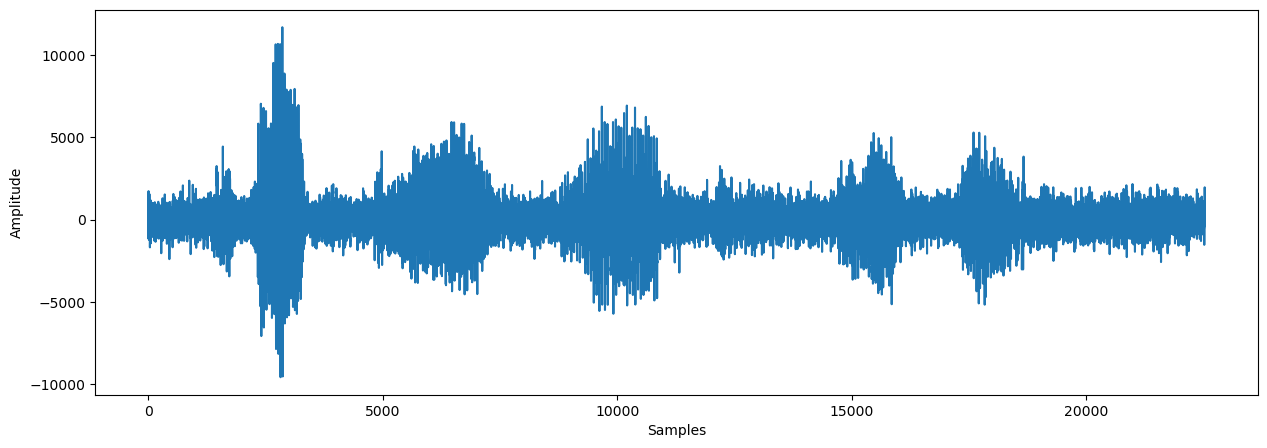

In [9]:
plt.figure(figsize = (15, 5))
plt.plot(noisy_s)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

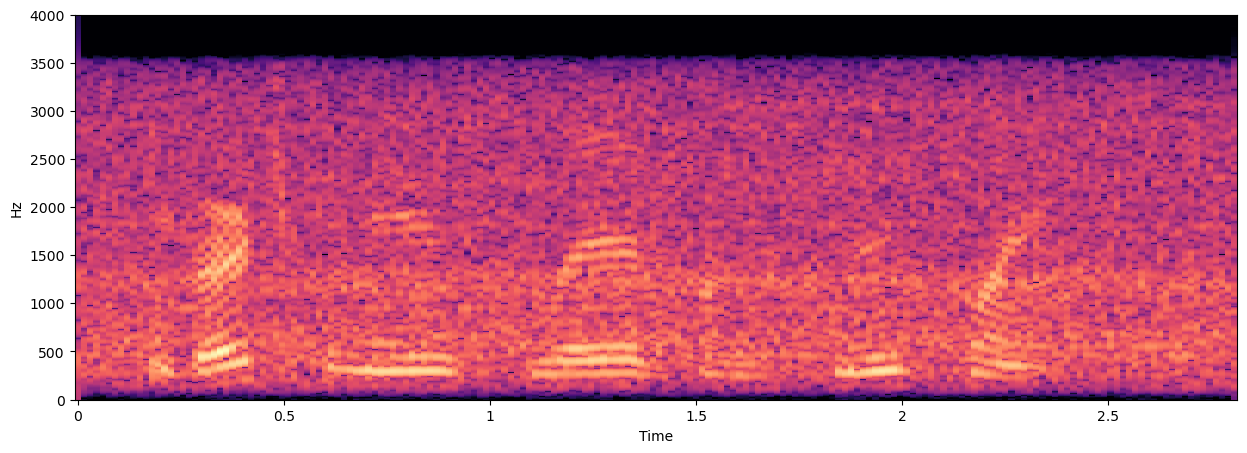

In [10]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'
noisy_S = librosa.stft(np.float32(noisy_s),
 n_fft = freq_range,
 window = window,
 hop_length = hop_length,
 win_length = win_length)
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(
 #spectrogram
 noisy_Sdb,

 #sampling rate
 sr = noisy_f,

 #label for horizontal axis
 x_axis = 'time',

 #presentation scale
 y_axis = 'linear',

 #hop_lenght
 hop_length = hop_length)

In [12]:
from scipy import signal
#order
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 1000
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'lowpass'
#filter
h = signal.butter(N = order,
 fs = sampling_freq,
 Wn = cutoff_freq,
 btype = filter_type,
 analog = False,
 output = 'sos')

In [13]:
filtered_s = signal.sosfilt(h, noisy_s)

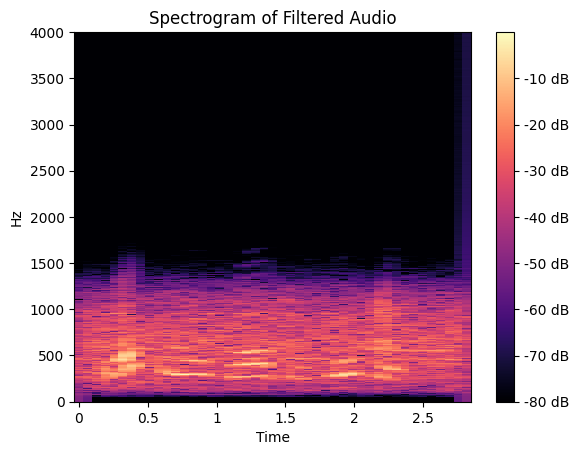

In [53]:
# Create an AudioSegment object
filtered_s_audio = pydub.AudioSegment(
    data=array.array(noisy_speech.array_type, np.float16(filtered_s)),
    sample_width=2,
    frame_rate=noisy_f,
    channels=1
)

# Load the audio using librosa
filtered_s, sr = librosa.load('sp01_station_sn5_lowpass.wav', sr=None)

# Compute the spectrogram
hop_length = 512  # Adjust this value as needed
n_fft = 2048      # Adjust this value as needed
spec = np.abs(librosa.stft(filtered_s, hop_length=hop_length, n_fft=n_fft))

# Convert to dB scale
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

# Plot the spectrogram using librosa.display.specshow
librosa.display.specshow(
    spec_db,
    sr=sr,
    x_axis='time',
    y_axis='linear',
    hop_length=hop_length
)

plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram of Filtered Audio')
plt.show()


#### Task 1

In [54]:
#highpass
from scipy import signal
#order
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 200
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'highpass'
#filter
h = signal.butter(N = order,
 fs = sampling_freq,
 Wn = cutoff_freq,
 btype = filter_type,
 analog = False,
 output = 'sos')

filtered_s = signal.sosfilt(h, noisy_s)

import array
import pydub
from pydub import AudioSegment
filtered_s_audio = pydub.AudioSegment(
 #raw data
 data = array.array(noisy_speech.array_type, np.float16(filtered_s)),

 #2 bytes = 16 bit samples
 sample_width = 2,

 #frame rate
 frame_rate = noisy_f,

 #channels = 1 for mono and 2 for stereo
 channels = 1)
filtered_s_audio.export('sp01_station_sn5_highpass.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_highpass.wav'>

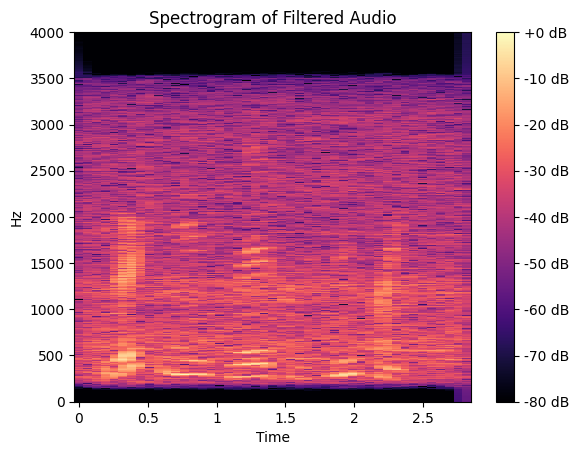

In [55]:
# Load the audio using librosa
filtered_s, sr = librosa.load('sp01_station_sn5_highpass.wav', sr=None)

# Compute the spectrogram
hop_length = 512  # Adjust this value as needed
n_fft = 2048      # Adjust this value as needed
spec = np.abs(librosa.stft(filtered_s, hop_length=hop_length, n_fft=n_fft))

# Convert to dB scale
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

# Plot the spectrogram using librosa.display.specshow
librosa.display.specshow(
    spec_db,
    sr=sr,
    x_axis='time',
    y_axis='linear',
    hop_length=hop_length
)

plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram of Filtered Audio')
plt.show()

#### Task 2

In [56]:
# Define the filter parameters
order = 10
sampling_freq = noisy_f  # Assuming you have defined noisy_f earlier
cutoff_freq = [200, 1000]  # Pass band range
filter_type = 'bandpass'

# Design the Butterworth band-pass filter
h = signal.butter(N=order,
                  fs=sampling_freq,
                  Wn=cutoff_freq,
                  btype=filter_type,
                  analog=False,
                  output='sos')

# Apply the filter to the noisy signal
filtered_s = signal.sosfilt(h, noisy_s)  # Assuming you have defined noisy_s earlier

# Create an AudioSegment from the filtered signal
filtered_s_audio = pydub.AudioSegment(
    data=array.array(noisy_speech.array_type, np.float16(filtered_s)),
    sample_width=2,  # 2 bytes = 16 bit samples
    frame_rate=noisy_f,
    channels=1  # 1 for mono
)

# Export the filtered audio to a WAV file
filtered_s_audio.export('sp01_station_sn5_bandpass.wav', format='wav')

<_io.BufferedRandom name='sp01_station_sn5_bandpass.wav'>

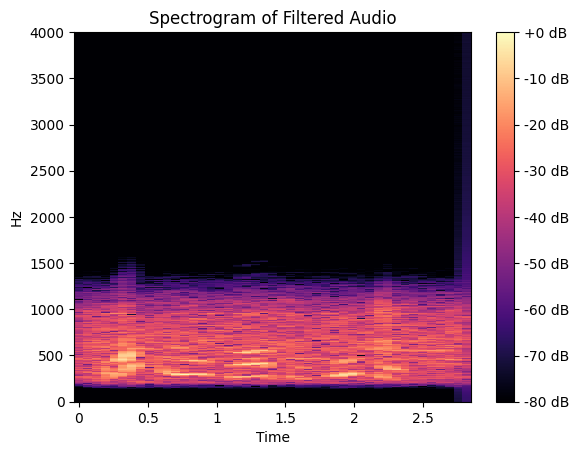

In [57]:
# Load the audio using librosa
filtered_s, sr = librosa.load('sp01_station_sn5_bandpass.wav', sr=None)

# Compute the spectrogram
hop_length = 512  # Adjust this value as needed
n_fft = 2048      # Adjust this value as needed
spec = np.abs(librosa.stft(filtered_s, hop_length=hop_length, n_fft=n_fft))

# Convert to dB scale
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

# Plot the spectrogram using librosa.display.specshow
librosa.display.specshow(
    spec_db,
    sr=sr,
    x_axis='time',
    y_axis='linear',
    hop_length=hop_length
)

plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram of Filtered Audio')
plt.show()

#### Task 3

In [263]:
# Read audio data from file
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp05_station_sn5.wav')
y = noisy_speech.get_array_of_samples() # samples x(t)
y_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(y_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
Y = librosa.stft(np.float32(y), n_fft = 2048, window = 'hann', hop_length = hop_length, win_length = win_length)
mag_Y = abs(Y)

In [264]:
# Read the noise data from file
noise_audio = AudioSegment.from_wav('Noise/Station/Station_1.wav')
d = noise_audio.get_array_of_samples()  # Samples of noise signal d(t)
d_f = noise_audio.frame_rate  # Sampling rate of the noise signal

# Define window size and hop length for processing the noise signal
win_length = int(y_f * 0.03)  # 30ms window
hop_length = int(win_length / 2)  # Default hop length is half of the window size

# Compute the Short-Time Fourier Transform (STFT) of the noise signal
D = librosa.stft(np.float32(d),
                 n_fft=2048,
                 window='hann',
                 hop_length=hop_length,
                 win_length=win_length)

# Calculate the square of the magnitude of D
mag_D = np.abs(D)
square_mag_D = mag_D * mag_D

In [265]:
means_mag_D = np.mean(square_mag_D, axis = 1)
np.shape(means_mag_D)

(1025,)

In [266]:
# Step 2: Implement the Fourier transform H 
# Transfer function H
H = np.sqrt(np.maximum(0, 1 - ((means_mag_D[:, np.newaxis]) / np.square(mag_Y))))

# Step 3: Estimate the Fourier transform S_hat
S_hat = mag_Y * H

# Step 4: Get the inverse of S_hat to retrieve s_hat
s_hat = librosa.istft(S_hat, win_length=win_length, hop_length=hop_length, length=len(y))

# Step 5: Save s_hat to a file named sp01_station_sn5_spectralsubtraction.wav
s_hat_truncated = np.float16(s_hat)
for i, num in enumerate(s_hat_truncated):
    if num > 32767:
        s_hat_truncated[i] = 32767
    elif num < -32768:
        s_hat_truncated[i] = -32768

s_hat_audio = pydub.AudioSegment(
    data=array.array(noisy_speech.array_type, s_hat_truncated),
    sample_width=2,  # 2 bytes = 16 bit samples
    frame_rate= y_f,
    channels=1  # 1 for mono
)
s_hat_audio.export('sp05_station_sn5_spectralsubtraction.wav', format='wav')

<_io.BufferedRandom name='sp05_station_sn5_spectralsubtraction.wav'>

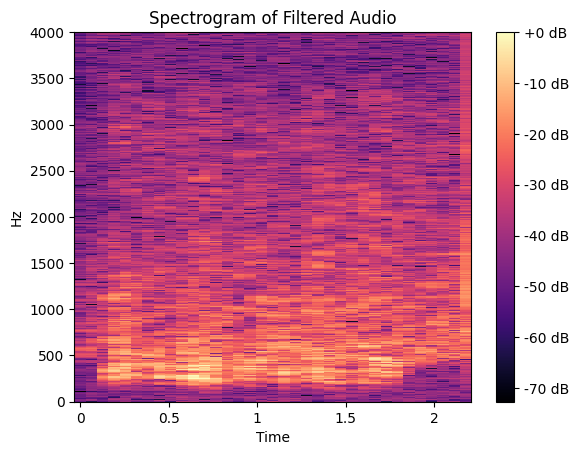

In [267]:
# Step 7: Visualize the spectrogram of S_hat and the clean signal in CleanSignal/sp01.wav
filtered_s, sr = librosa.load('sp05_station_sn5_spectralsubtraction.wav', sr=None)

# Compute the spectrogram
hop_length = 512  # Adjust this value as needed
n_fft = 2048      # Adjust this value as needed
spec = np.abs(librosa.stft(filtered_s, hop_length=hop_length, n_fft=n_fft))

# Convert to dB scale
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

# Plot the spectrogram using librosa.display.specshow
librosa.display.specshow(
    spec_db,
    sr=sr,
    x_axis='time',
    y_axis='linear',
    hop_length=hop_length
)

plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram of Filtered Audio')
plt.show()

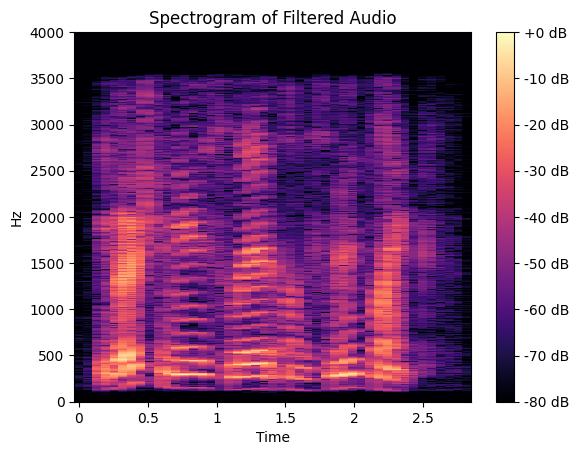

In [112]:
filtered_s, sr = librosa.load('CleanSignal/sp01.wav', sr=None)

# Compute the spectrogram
hop_length = 512  # Adjust this value as needed
n_fft = 2048      # Adjust this value as needed
spec = np.abs(librosa.stft(filtered_s, hop_length=hop_length, n_fft=n_fft))

# Convert to dB scale
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

# Plot the spectrogram using librosa.display.specshow
librosa.display.specshow(
    spec_db,
    sr=sr,
    x_axis='time',
    y_axis='linear',
    hop_length=hop_length
)

plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram of Filtered Audio')
plt.show()

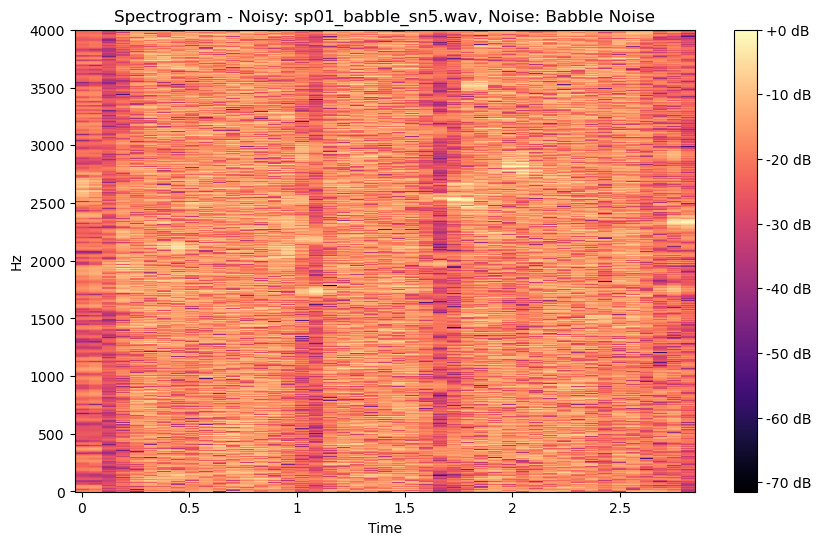

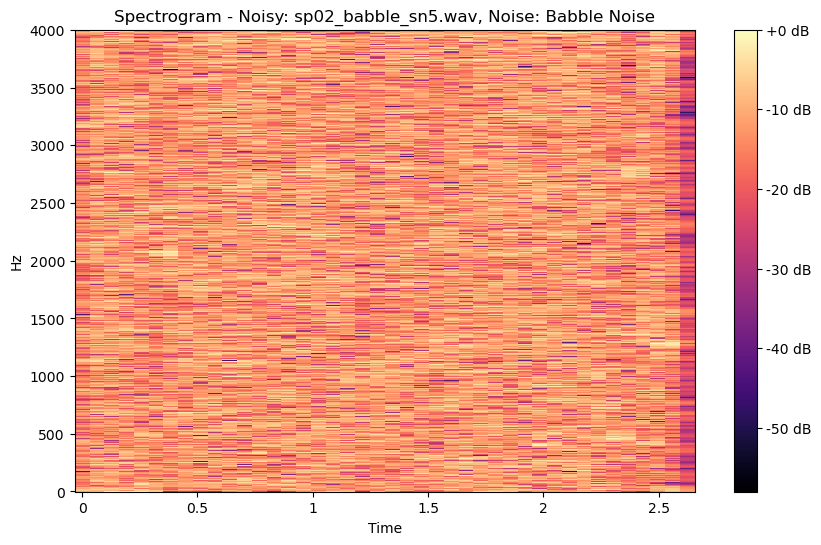

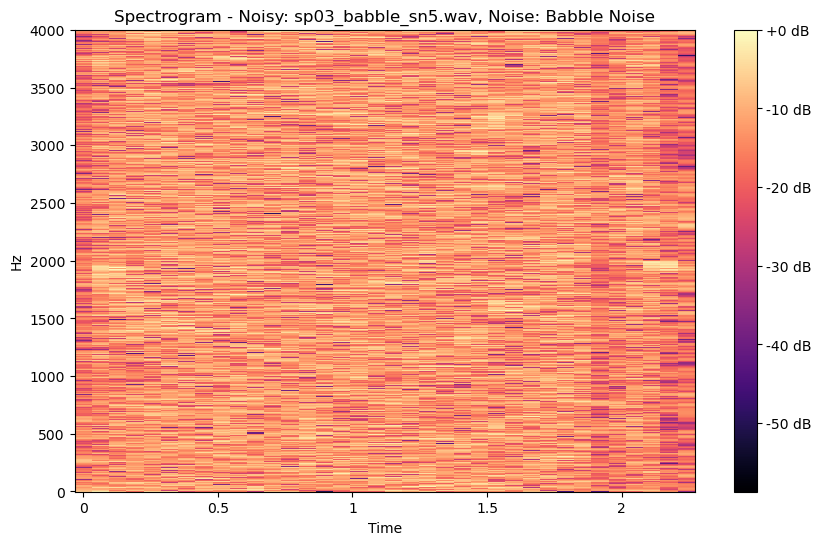

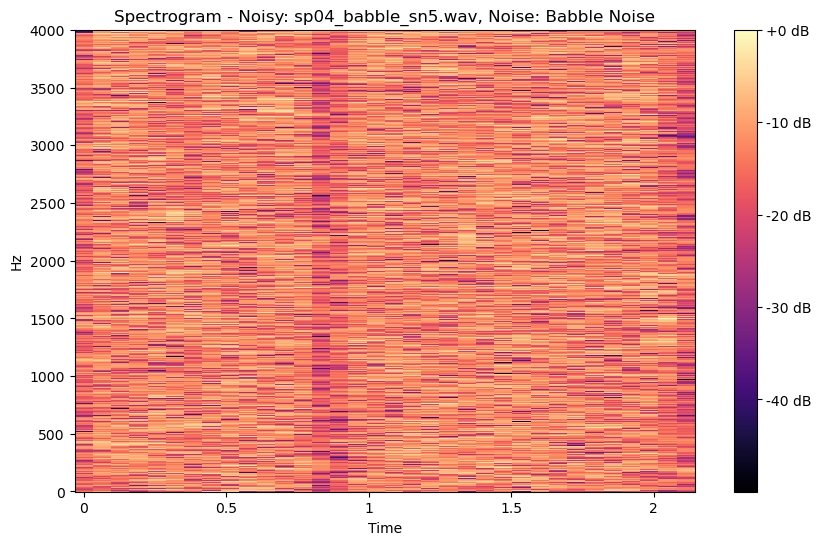

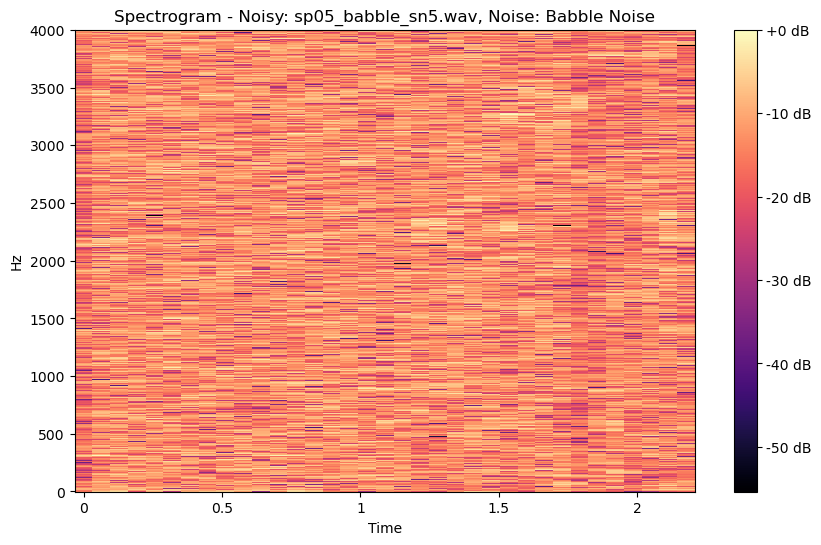

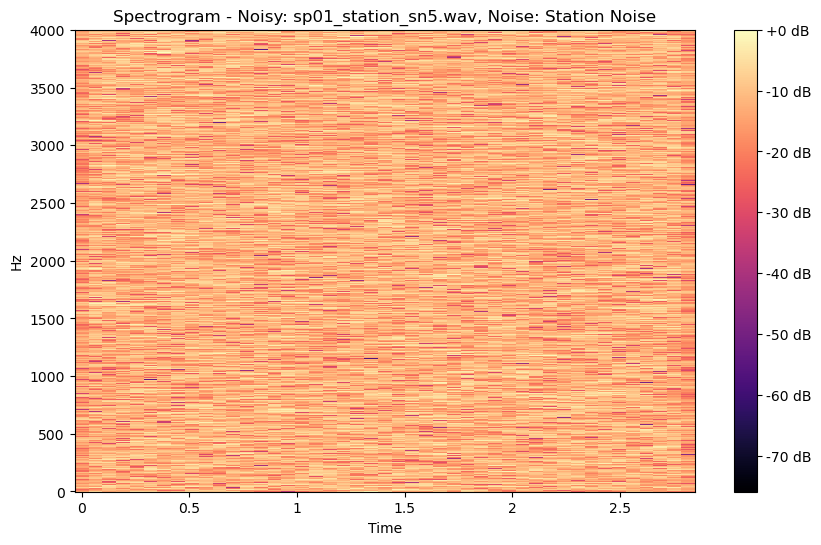

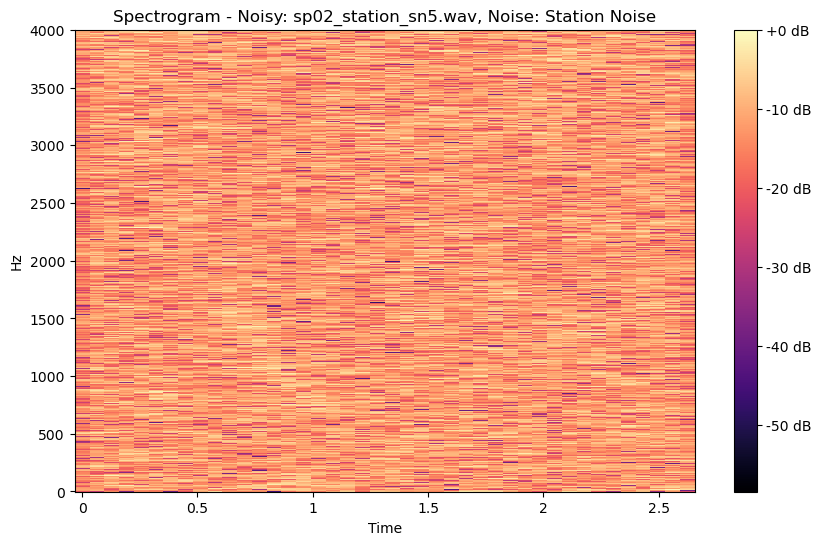

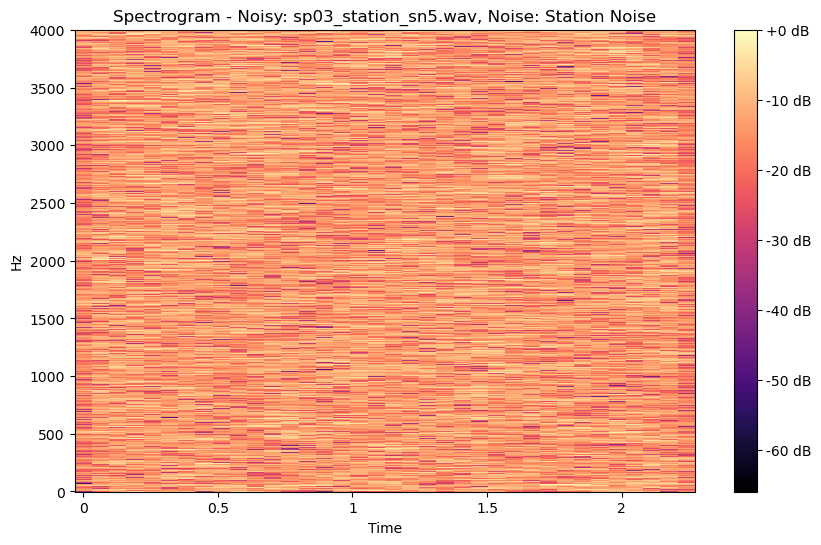

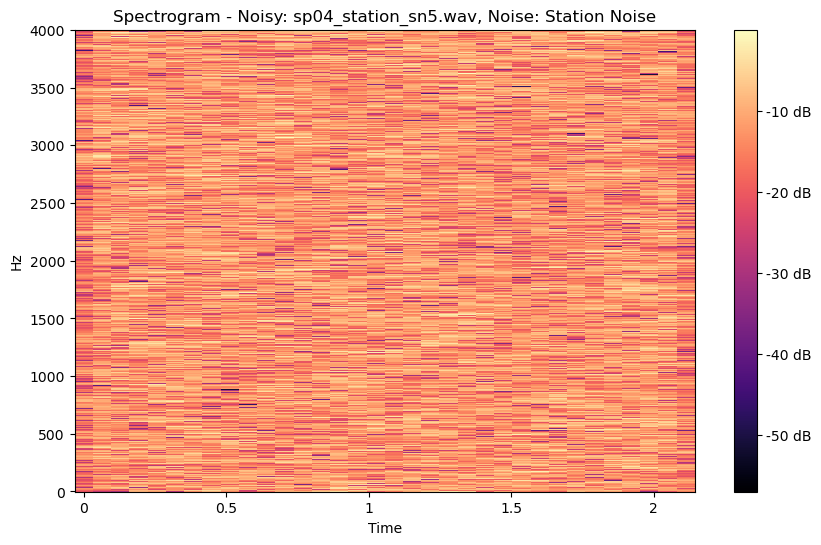

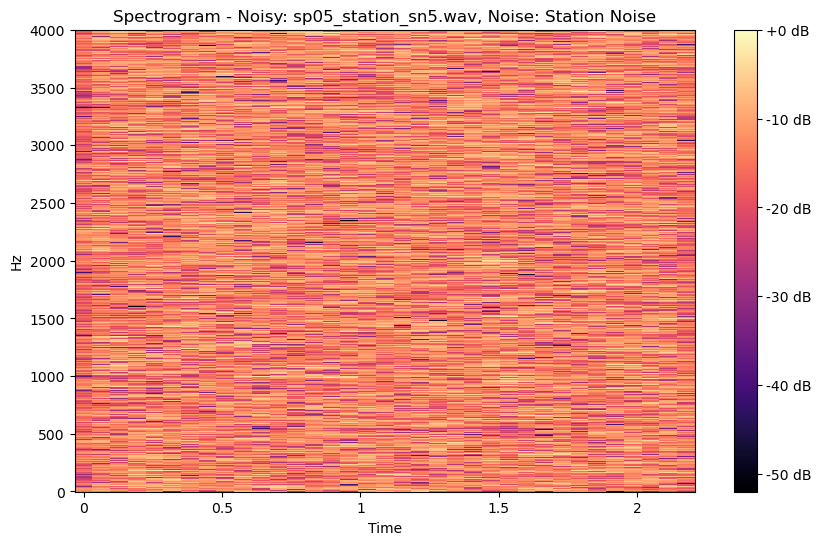

In [30]:
# Loop through subfolders
for subfolder in subfolders:
    noisy_subfolder_path = os.path.join(noisy_signal_dir, subfolder)
    noise_subfolder_path = os.path.join(noise_dir, subfolder)

    # Create a directory for saving the processed files
    output_subfolder_path = os.path.join('CleanSignal', subfolder)
    os.makedirs(output_subfolder_path, exist_ok=True)

    # Loop through all files in the subfolders
    for filename in os.listdir(noisy_subfolder_path):
        if filename.endswith(".wav"):
            # Define input, noise, and output paths
            input_path = os.path.join(noisy_subfolder_path, filename)
            noise_filename = f'sp{filename[2:4].lower()}_{subfolder.lower()}_sn5.wav'  # Use lowercase for filenames
            n_filename = f'{subfolder}_1.wav'
            noise_path = os.path.join(noise_subfolder_path, n_filename)
            output_path = os.path.join(output_subfolder_path, filename.replace('.wav', '_spectralsubtraction.wav'))

            # Perform spectral subtraction
            spectral_subtraction(input_path, noise_path, output_path)

            # Determine the noise category (Babble or Station)
            noise_category = "Babble" if subfolder == "Babble" else "Station"

            # Visualize the spectrogram of the original noisy signal and the estimated clean signal
            filtered_s, sr = librosa.load(output_path, sr=None)
            hop_length = 512  # Adjust this value as needed
            n_fft = 2048      # Adjust this value as needed
            spec = np.abs(librosa.stft(filtered_s, hop_length=hop_length, n_fft=n_fft))
            spec_db = librosa.amplitude_to_db(spec, ref=np.max)

            # Plot the spectrogram using librosa.display.specshow
            plt.figure(figsize=(10, 6))
            
            # Use librosa.display to plot the spectrogram
            librosa.display.specshow(
                spec_db,
                sr=sr,
                x_axis='time',
                y_axis='linear'
            )

            # Set the title of the plot
            plt.title(f'Spectrogram - Noisy: {filename}, Noise: {noise_category} Noise')

            # Load the actual clean signal
            clean_signal_path = os.path.join('CleanSignal', subfolder.lower(), filename)
            if os.path.exists(clean_signal_path):
                clean_s, sr = librosa.load(clean_signal_path, sr=None)
                spec = np.abs(librosa.stft(clean_s, hop_length=hop_length, n_fft=n_fft))
                spec_db = librosa.amplitude_to_db(spec, ref=np.max)

                # Use librosa.display to plot the spectrogram
                plt.figure(figsize=(10, 6))
                librosa.display.specshow(
                    spec_db,
                    sr=sr,
                    x_axis='time',
                    y_axis='linear'
                )

                # Set the title of the plot
                plt.title(f'Spectrogram - Clean: {filename}')

            plt.colorbar(format="%+2.0f dB")
            plt.show()
